In [1]:
%matplotlib inline
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

from time import time

In [2]:
class oi_1d (object):
    """
    Initialize io class with observations, error, and background
    information.
    >>> o = oi(xi, Di, De, B=None, Be=None)
    where:
        xi are the measurement points
        Di are the observations
        De are the observational errors (standard deviation)
        B is a function defining the background field (default = 0.0)
        Be is the background error (default = Di.std())
    
    Methods:
    >>> o.interpolate(x, Ro)
    where:
        x are the gridpoints.
        Ro is the background error covariance decay scale.
    """    
    def __init__(self, xi, x, Ro, Be):
        self.xi = xi            # Measurement points
        self.x = x
        self.Ro = Ro
        self.Be = Be
        # Construct background error covariance matricies
        self.Bi = np.exp(-(self.x[np.newaxis,:]-self.xi[:,np.newaxis])**2/self.Ro**2)*self.Be
        self.B = np.exp(-(self.xi[np.newaxis,:]-self.xi[:,np.newaxis])**2/self.Ro**2)*self.Be
    
    def interpolate(self, Di, De):
        """Return optimally interpolated field and analysis error"""
        self.Di = Di            # Observations
        self.De = De            # Observation error
        self.N = Di.size
        # Construct observational error covariance matrix (diagonal)
        self.O = self.De**2*np.eye(self.N)
        # Weights, analysis and analysis error
        self.W = np.dot(np.linalg.inv(self.B + self.O), self.Bi)
        A = np.dot(self.Di,self.W).T
        Ea = np.diag(np.sqrt( self.Be - np.dot(self.W.T, self.Bi)))
        return A, Ea

Calculated in   0.013 seconds


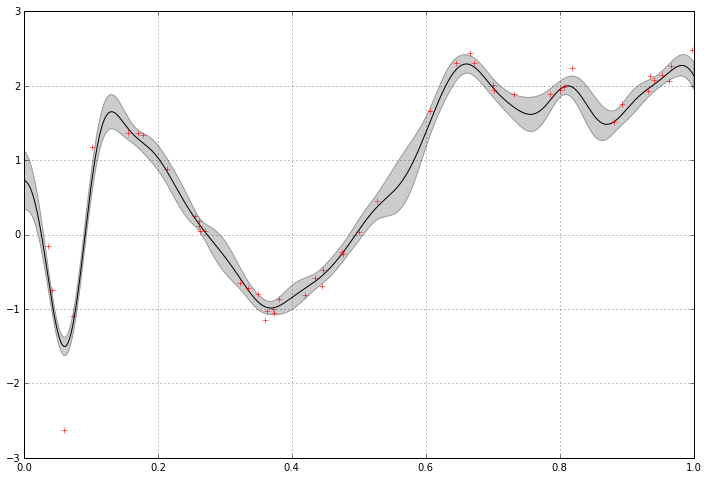

In [36]:
# Define the Truth
def T(x):
    return np.sin(10.0*np.pi*x)

# Observations
N = 20
#    xi = (10.0*rand(N)).round() / 10.0
xi = np.random.rand(N)
De = 0.2
Di = T(xi) + De*np.random.randn(N)

xi, Di = np.loadtxt('/Users/rdh/data_assimilation/data/oi_data.dat').T


# Grid and backround information
x = np.mgrid[0.0:1.0:1000j]

# Optimal interpolation
t_start = time()
o = oi_1d(xi, x, Ro=0.05, Be=0.25)
A, Ea = o.interpolate(Di, De)
print('Calculated in %7.3f seconds' % (time()-t_start))

# Plotting
plt.plot(x, A, '-k')
# plt.plot(x, T(x), 'b--')
plt.fill_between(x, A+Ea, A-Ea,
        facecolor=(0.8, 0.8, 0.8), edgecolor=(0.6, 0.6, 0.6))
plt.plot(xi, Di, 'r+')
plt.grid(True)
